In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

**Conhecendo o dataset**

In [0]:
iris_dataset = load_iris()

In [4]:

print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print(iris_dataset['DESCR'][:200] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes
...


In [6]:
print("Target Names: {}".format(iris_dataset['target_names']))

Target Names: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Features Names: {}".format(iris_dataset['feature_names']))

Features Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("Shape of data {}".format(iris_dataset['data'].shape))

Shape of data (150, 4)


In [9]:
print("Shape of data {}".format(iris_dataset['data'][:5]))

Shape of data [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


**Separando o dataset em dados de treinamento e de teste**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [11]:
print("X_train shape: {}".format(X_train.shape)) #112 rows and 4 columns
print("y_train shape: {}".format(y_train.shape)) #122 rows: just the labels ['setosa' 'versicolor' 'virginica']

X_train shape: (112, 4)
y_train shape: (112,)


In [12]:
print("X_test shape: {}".format(X_test.shape)) #38 rows and 4 columns
print("y_test shape: {}".format(y_test.shape)) #38 rows: just the labels ['setosa' 'versicolor' 'virginica']

X_test shape: (38, 4)
y_test shape: (38,)


**Instalando o mglearn que será usado para a plotagem**

In [13]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 7.6MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


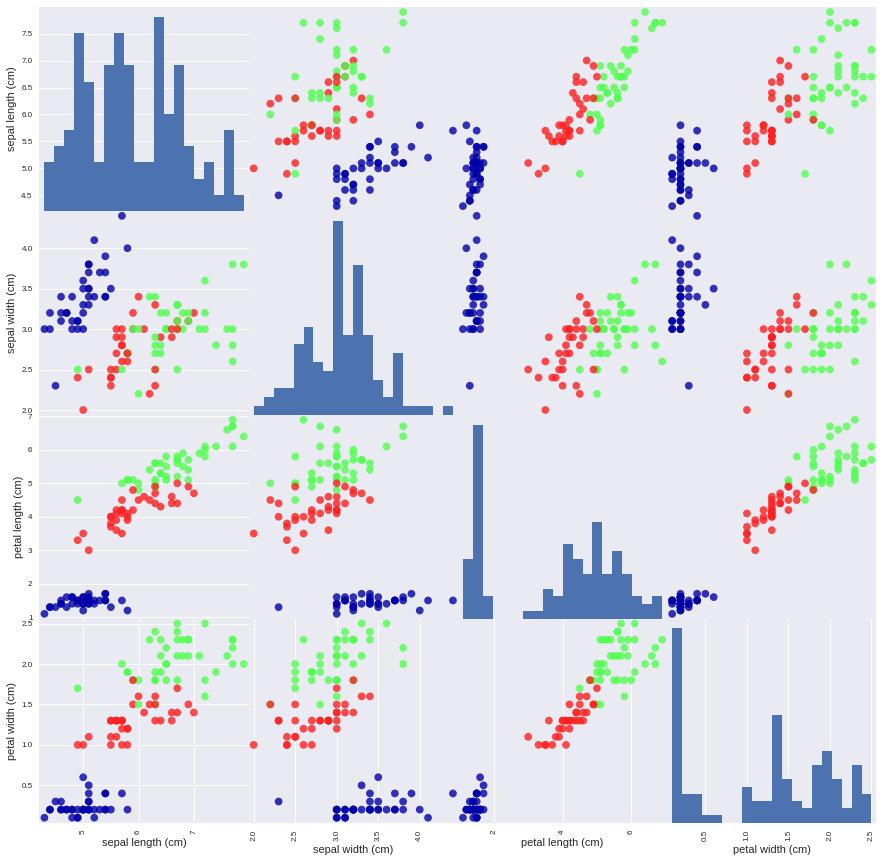

In [14]:
import mglearn

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

**Implementando o KNN**

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Evaluating the Model**

In [24]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97
